In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data= pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
x=data.iloc[:,2:4].values

In [8]:
x.shape

(400, 2)

In [10]:
y=data.iloc[:,-1].values

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [17]:
x_train.shape


(320, 2)

In [18]:
x_test.shape

(80, 2)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
X_train=scaler.fit_transform(x_train)

In [21]:
X_test=scaler.transform(x_test)

In [22]:
# calculate the value of k
np.sqrt(x_train.shape[0])

17.88854381999832

In [23]:
k=17

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=k)


In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [26]:
y_pred=knn.predict(X_test)

In [27]:
y_pred.shape

(80,)

In [28]:
y_test.shape

(80,)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8625

In [31]:
# 2nd method
accuracy=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [33]:
len(accuracy)

25

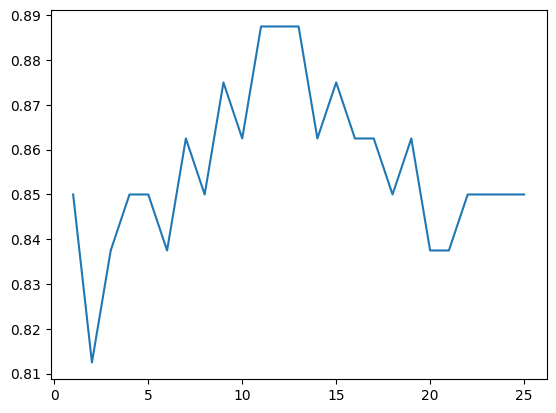

In [34]:
plt.plot(range(1,26),accuracy)

In [40]:
def predict_output():
    age=int(input("Enter the age"))
    salary=int(input("Enter the salary"))
    
    X_new=np.array([[age],[salary]]).reshape(1,2)
    X_new=scaler.transform(X_new)
    
    if knn.predict(X_new)[0]==0:
        return "will not purchase"
    else:
        return "will purchase"
    
    

In [41]:
predict_output()

'will not purchase'

decition boundary for knn


# step 1: train the classifier  on the training set

In [49]:
# step2: creating Meshgrid

a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,0].max()+1,step=0.01)

XX,YY=np.meshgrid(a,b)

In [57]:
# step 3: classifiying every point on the meshgrid

input_array=np.array([XX.ravel(),YY.ravel()]).T
labels=knn.predict(input_array)

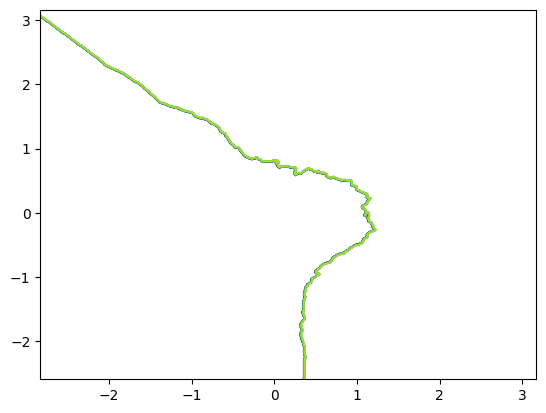

In [58]:
# 4 :ploting the  array  as an image
plt.contour(XX,YY,labels.reshape(XX.shape))


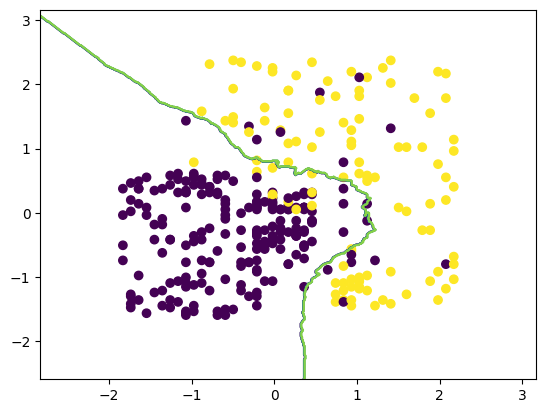

In [61]:
#5 ploting all the training data on the plot
plt.contour(XX,YY,labels.reshape(XX.shape),alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)